Applying feature selection and importance to sonar data for insight 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Data_set/sonar_data.data', header=None)

In [3]:
df.columns = ['feature0','feature1','feature02','feature3','feature4','feature5','feature6','feature7','feature8','feature9','feature10',
              'feature11','feature12','feature13','feature14','feature15','feature16','feature17','feature18','feature19','feature20',
              'feature21','feature22','feature23','feature24','feature25','feature26','feature27','feature28','feature29','feature30'
             ,'feature31','feature32','feature33','feature34','feature35','feature36','feature37','feature38','feature39','feature40'
             ,'feature41','feature42','feature43','feature44','feature45','feature46','feature47','feature48','feature49','feature50'
             ,'feature51','feature52','feature53','feature54','feature55','feature56','feature57','feature58','feature59','class']

In [4]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['class'].values)
X = df.iloc[:, 0:60].values

In [5]:
#pd.DataFrame(X)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.1, solver='liblinear', multi_class='auto')
# Note that C=1.0 is the default. You can increase
# or decrease it to make the regulariztion effect
# stronger or weaker, respectively.
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))


Training accuracy: 0.8269230769230769
Test accuracy: 0.6923076923076923


In [26]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=100, random_state=1)##linear
svm.fit(X_train_std, y_train)

SVC(C=100, random_state=1)

In [27]:
print('Training accuracy:', svm.score(X_train_std, y_train))
print('Test accuracy:', svm.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 0.8846153846153846


In [62]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=1)
tree.fit(X_train, y_train)

print('Training accuracy:', tree.score(X_train, y_train))
print('Test accuracy:', tree.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 0.8269230769230769


In [65]:
from sklearn.ensemble import RandomForestClassifier
forest1 = RandomForestClassifier(criterion='gini', n_estimators=20, random_state=1, n_jobs=2)
forest1.fit(X_train, y_train)

print('Training accuracy:', forest1.score(X_train, y_train))
print('Test accuracy:', forest1.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 0.75


In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.8653846153846154
Test accuracy: 0.8461538461538461


In [32]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [33]:
class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size,
                                                            random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score


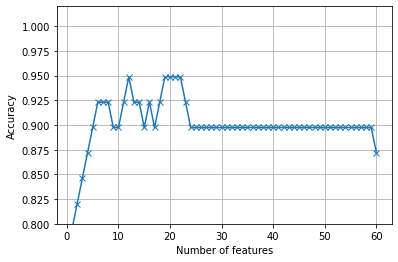

In [42]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='x')
plt.ylim([0.8, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [49]:
#k3 = list(sbs.subsets_[13])
#print(df.columns[1:][k3])

 1) feature10                      0.060631
 2) feature8                       0.057836
 3) feature48                      0.050147
 4) feature9                       0.047315
 5) feature47                      0.046966
 6) feature11                      0.045884
 7) feature44                      0.032995
 8) feature46                      0.028523
 9) feature35                      0.028407
10) feature51                      0.025338
11) feature45                      0.023392
12) feature36                      0.021605
13) feature20                      0.019885
14) feature12                      0.019234
15) feature43                      0.017284
16) feature50                      0.016996
17) feature27                      0.016131
18) feature3                       0.015760
19) feature16                      0.015568
20) feature19                      0.013755
21) feature26                      0.013708
22) feature4                       0.013690
23) feature15                   

(-1.0, 60.0)

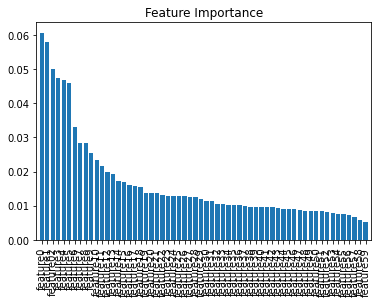

In [52]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df.columns[0:60]
forest_ = RandomForestClassifier(n_estimators=500, random_state=1)
forest_.fit(X_train, y_train)

importances = forest_.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

    
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),

importances[indices], align='center')

plt.xticks(range(X_train.shape[1]),
           feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])